In [1]:
import time
start = time.time()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz

from sklearn import ensemble

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/davidmertenjones/Thinkful_DSB_Unit_1/master/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df2 = df

In [4]:
# Change "No phone service" and "No internet service" to 0, Yes/No to 1/0

df2['MultipleLines'] = df2['MultipleLines'].replace('No phone service', 0)
df2['OnlineSecurity'] = df2['OnlineSecurity'].replace('No internet service', 0)
df2['OnlineBackup'] = df2['OnlineBackup'].replace('No internet service', 0)
df2['DeviceProtection'] = df2['DeviceProtection'].replace('No internet service', 0)
df2['TechSupport'] = df2['TechSupport'].replace('No internet service', 0)
df2['StreamingTV'] = df2['StreamingTV'].replace('No internet service', 0)
df2['StreamingMovies'] = df2['StreamingMovies'].replace('No internet service', 0)
df2 = df2.replace({'No': 0, 'Yes': 1})
df2['TotalCharges'] = df2['StreamingMovies'].replace(' ', 0)

In [5]:
df2 = df2.fillna(0)

In [6]:
features = pd.DataFrame(df2.drop('customerID', axis=1))

In [7]:
features['MonthtoMonth'] = np.where((features['Contract'] == 'Month-to-month'), 1, 0)
features['OneYear'] = np.where((features['Contract'] == 'One year'), 1, 0)
features['TwoYear'] = np.where((features['Contract'] == 'Two year'), 1, 0)

In [8]:
features['DSL'] = np.where((features['InternetService'] == 'DSL'), 1, 0)
features['FiberOptic'] = np.where((features['InternetService'] == 'Fiber optic'), 1, 0)

In [9]:
features['genderFemale'] = np.where((features['gender'] == 'Female'), 1, 0)

In [10]:
features['AutoPay'] = np.where(((features['PaymentMethod'] == 'Bank transfer (automatic)') | (features['PaymentMethod'] == 'Credit card (automatic)')), 1, 0)

In [11]:
features['TotalCharges'] = features['TotalCharges'].apply(lambda x: float(x))

In [12]:
def plotcolumn(plotterm, features=features):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(features[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(features[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((features[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(features[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(features[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

This looks somewhat troubling in terms of normality:

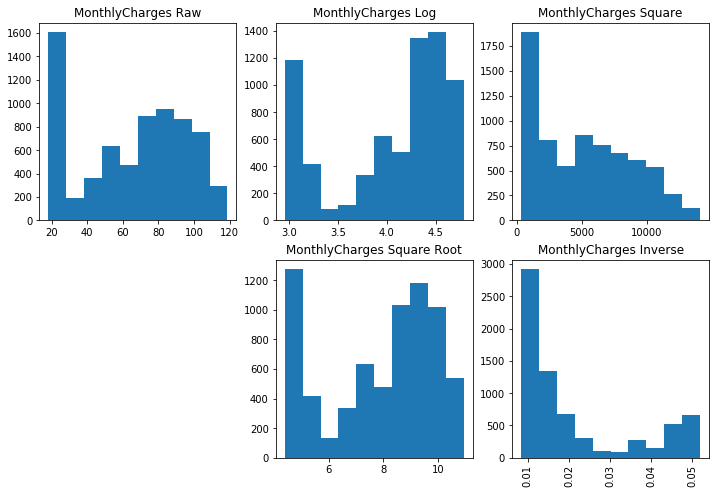

In [13]:
plotcolumn('MonthlyCharges')

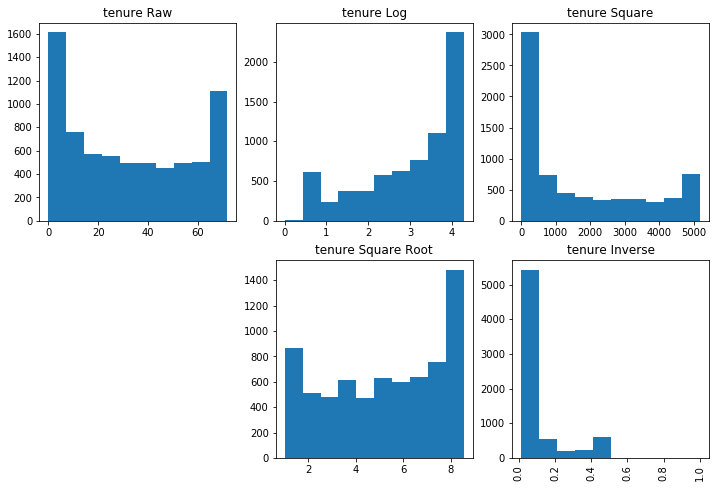

In [14]:
plotcolumn('tenure')

In [15]:
timestep1 = time.time()
print(timestep1 - start)

9.764908075332642


# Pre-Feature Selection

In [16]:
features2 = pd.DataFrame(features.drop(['gender', 'Contract', 'PaymentMethod', 'tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService'], axis=1))

In [17]:
features['TotalCharges'] = features['TotalCharges'].apply(lambda x: float(x))

In [18]:
features2churn = pd.DataFrame(features['Churn'])

In [19]:
timestep2 = time.time()
print('Step Time: ', timestep2 - timestep1)
print('Total Time: ', timestep2 - start)

Step Time:  0.4941380023956299
Total Time:  10.259046077728271


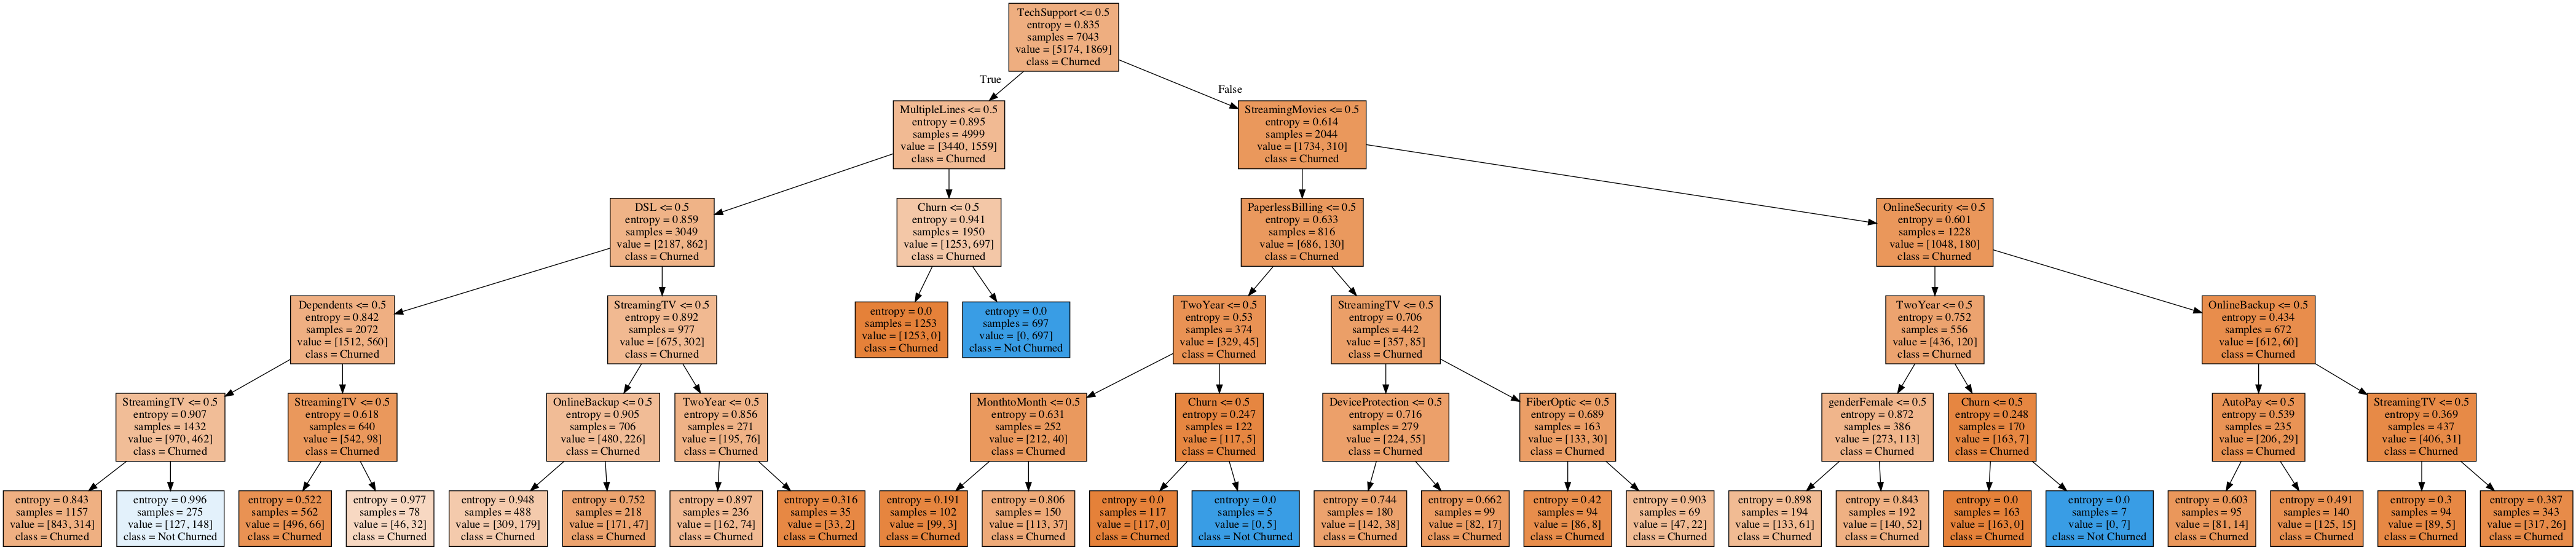

In [20]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(features2, features2churn)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=features2.columns,
    class_names=['Churned', 'Not Churned'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
timestep3 = time.time()
print('Step Time: ', timestep3 - timestep2)
print('Total Time: ', timestep3 - start)

Step Time:  2.0897269248962402
Total Time:  12.348773002624512


In [22]:
features2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
PaperlessBilling    7043 non-null int64
Churn               7043 non-null int64
MonthtoMonth        7043 non-null int64
OneYear             7043 non-null int64
TwoYear             7043 non-null int64
DSL                 7043 non-null int64
FiberOptic          7043 non-null int64
genderFemale        7043 non-null int64
AutoPay             7043 non-null int64
dtypes: int64(20)
memory usage: 1.1 MB


In [23]:
features2.corr()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MonthtoMonth,OneYear,TwoYear,DSL,FiberOptic,genderFemale,AutoPay
SeniorCitizen,1.000000,0.016479,-0.211185,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.150889,0.138360,-0.046262,-0.117000,-0.108322,0.255338,0.001874,-0.033520
Partner,0.016479,1.000000,0.452676,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,-0.150448,-0.280865,0.082783,0.248091,-0.000851,0.000304,0.001808,0.160475
Dependents,-0.211185,0.452676,1.000000,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.164221,-0.231720,0.068368,0.204613,0.052010,-0.165818,-0.010517,0.093439
PhoneService,0.008576,0.017706,-0.001762,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.011942,-0.000742,-0.002791,0.003519,-0.452425,0.289999,0.006488,-0.000104
MultipleLines,0.142948,0.142057,-0.024526,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.040102,-0.088203,-0.003794,0.106253,-0.199920,0.366083,0.008414,0.112872
OnlineSecurity,-0.038653,0.143106,0.080972,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,-0.171226,-0.246679,0.100162,0.191773,0.321269,-0.030696,0.017021,0.175469
OnlineBackup,0.066572,0.141498,0.023671,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,-0.082255,-0.164172,0.083722,0.111400,0.157884,0.165651,0.013773,0.147965
DeviceProtection,0.059428,0.153786,0.013963,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,-0.066160,-0.225662,0.102495,0.165096,0.146291,0.176049,0.002105,0.161961
TechSupport,-0.060625,0.119999,0.063268,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,-0.164674,-0.285241,0.095775,0.240824,0.313118,-0.020492,0.009212,0.181843
StreamingTV,0.105378,0.124666,-0.016558,-0.022574,0.257152,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.223841,0.063228,-0.112282,0.061612,0.072049,0.016274,0.329349,0.008393,0.072161


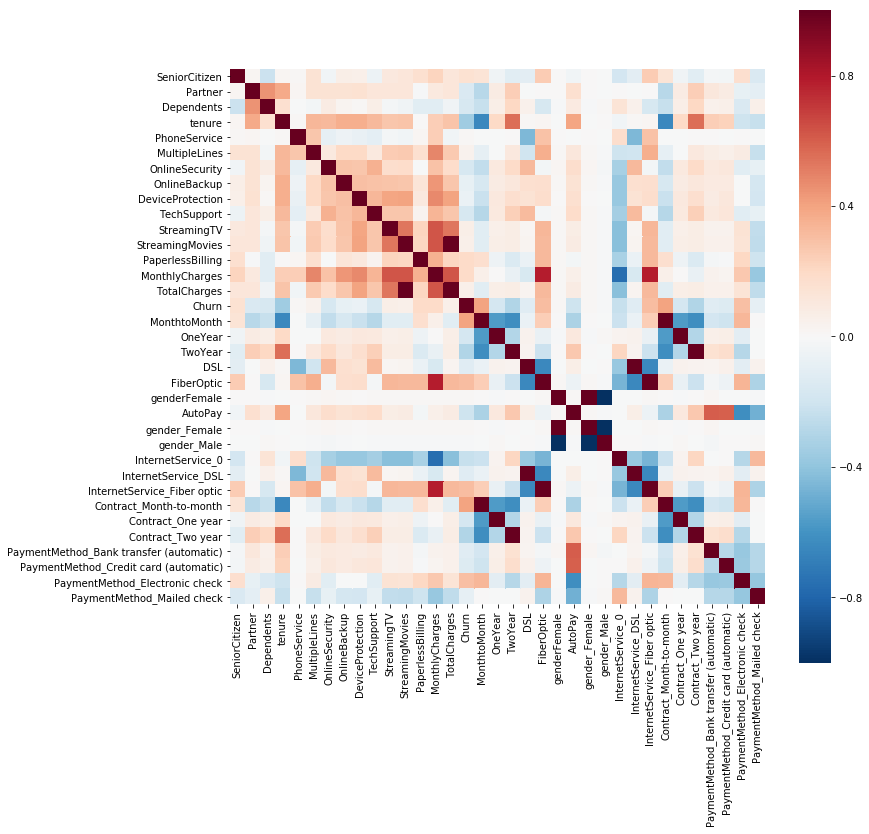

In [24]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(pd.get_dummies(features).corr(), vmax=1, vmin=-1, square=True, cmap='RdBu_r')
plt.show()

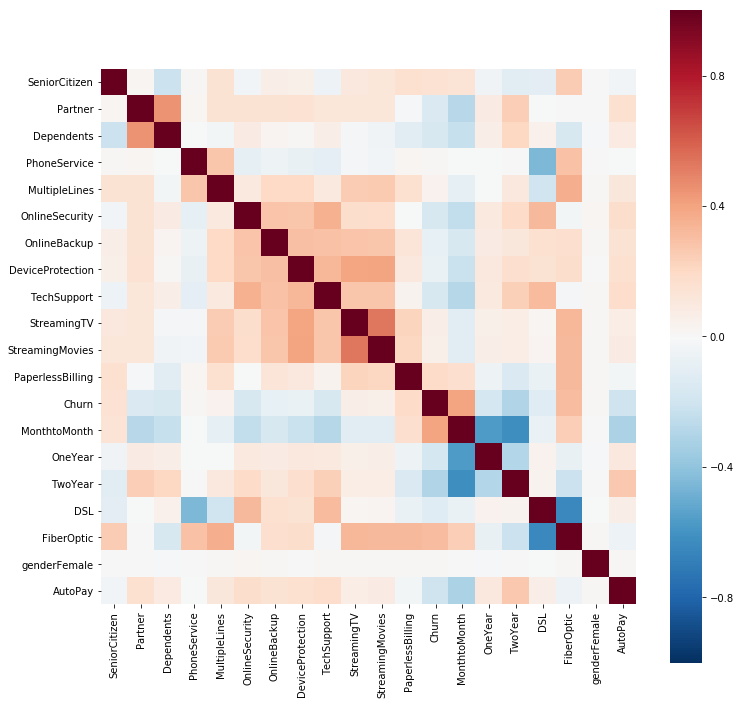

In [25]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(features2.corr(), vmax=1, vmin=-1, square=True, cmap='RdBu_r')
plt.show()

# Choosing Depth:

In [26]:
X = features2.drop('Churn', axis=1)
Y = features2['Churn'].values.reshape(-1, 1)

In [27]:
"""depth_dist = []

for g in range(0, 200):

    depths = []
    cvmeans = []
    cvstds = []


    for n in range(1, len(X.columns)):

        decision_tree = tree.DecisionTreeClassifier(
            criterion='entropy',
            max_features=1,
            max_depth=n,
        )

        decision_tree.fit(X, Y)

        cvscore = cross_val_score(decision_tree, X, Y, cv=10)
        depths.append(n)
        cvmeans.append(cvscore.mean())
        cvstds.append(cvscore.std()*2)

    depth_check = pd.DataFrame(columns=['Depths', 'CVMeans', 'CVStds'])
        
    depth_check['Depths'] = depths
    depth_check['CVMeans'] = cvmeans
    depth_check['CVStds'] = cvstds

    depth_dist.append(int(depth_check[depth_check['CVMeans'] == depth_check['CVMeans'].max()]['Depths'].values.tolist()[0]))"""

"depth_dist = []\n\nfor g in range(0, 200):\n\n    depths = []\n    cvmeans = []\n    cvstds = []\n\n\n    for n in range(1, len(X.columns)):\n\n        decision_tree = tree.DecisionTreeClassifier(\n            criterion='entropy',\n            max_features=1,\n            max_depth=n,\n        )\n\n        decision_tree.fit(X, Y)\n\n        cvscore = cross_val_score(decision_tree, X, Y, cv=10)\n        depths.append(n)\n        cvmeans.append(cvscore.mean())\n        cvstds.append(cvscore.std()*2)\n\n    depth_check = pd.DataFrame(columns=['Depths', 'CVMeans', 'CVStds'])\n        \n    depth_check['Depths'] = depths\n    depth_check['CVMeans'] = cvmeans\n    depth_check['CVStds'] = cvstds\n\n    depth_dist.append(int(depth_check[depth_check['CVMeans'] == depth_check['CVMeans'].max()]['Depths'].values.tolist()[0]))"

In [28]:
"""plt.rcParams['figure.figsize'] = 12, 4
plt.hist(depth_dist)
plt.show()"""

"plt.rcParams['figure.figsize'] = 12, 4\nplt.hist(depth_dist)\nplt.show()"

A depth of 8 appears to have the highest cross-validation score.

# Decision Tree Classifier, n_estimators=8

In [29]:
timestep4 = time.time()
print('Step Time: ', timestep4 - timestep3)
print('Total Time: ', timestep4 - start)

Step Time:  1.7035388946533203
Total Time:  14.052311897277832


In [30]:
X = features2.drop('Churn', axis=1)
Y = features2['Churn'].values.reshape(-1, 1)

In [31]:
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=9,
)

decision_tree.fit(X, Y)

cvscore = cross_val_score(decision_tree, X, Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.74468085  0.75177305  0.73475177  0.7787234   0.75284091  0.73011364
  0.74715909  0.75284091  0.75994318  0.73257468]
Cross-Validation Mean:
 0.748540148523
Cross-Validation +/- (2x STD):
 0.0274944078683


In [32]:
timestep5 = time.time()
print('Step Time: ', timestep5 - timestep4)

decision_tree_time = timestep5-timestep4

print('Total Time: ', timestep5 - start)

Step Time:  0.08971309661865234
Total Time:  14.142024993896484


In [33]:
# Render our tree.
"""dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Churned', 'Not Churned'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())"""

"dot_data = tree.export_graphviz(\n    decision_tree, out_file=None,\n    feature_names=X.columns,\n    class_names=['Churned', 'Not Churned'],\n    filled=True\n)\ngraph = pydotplus.graph_from_dot_data(dot_data)\nImage(graph.create_png())"

# Random Forest Classifier, n_estimators=5

In [34]:
timestep6 = time.time()
print('Step Time: ', timestep6 - timestep5)
print('Total Time: ', timestep6 - start)

Step Time:  0.013155937194824219
Total Time:  14.155180931091309


In [35]:
rfc = ensemble.RandomForestClassifier(n_estimators=5)

X = features2.drop('Churn', axis=1)
Y = features2['Churn']

rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
cvscore = cross_val_score(rfc, X, Y, cv=10)
print('Cross-Validation Score:\n', cvscore)
print('Cross-Validation Mean:\n', cvscore.mean())
print('Cross-Validation +/- (2x STD):\n', (cvscore.std()*2))

Cross-Validation Score:
 [ 0.74184397  0.75886525  0.76737589  0.74468085  0.73721591  0.72869318
  0.74431818  0.73863636  0.76988636  0.75248933]
Cross-Validation Mean:
 0.748400528888
Cross-Validation +/- (2x STD):
 0.0255361557387


In [37]:
timestep7 = time.time()
print('Step Time: ', timestep7 - timestep6)

random_forest_time = timestep7-timestep6

print('Total Time: ', timestep7 - start)

Step Time:  0.37352514266967773
Total Time:  14.528706073760986


In [38]:
decision_tree_time

0.08971309661865234

In [39]:
random_forest_time

0.37352514266967773

The runtime increases roughly proportionately to the number of classifiers in the forest.